In [26]:
import pandas as pd
from importlib import reload
import sys
sys.path.append("../../../../data/code")
import quantification

alternation_set = ["man", "werden"]
alternating = "alternating_nonagentivity_nonprimed"

## Annotation

In [27]:
import annotate_nonagentivity

## Overview

In [28]:
df = pd.read_csv("../../VACC.csv", sep=",", index_col=0, na_filter=False)
df.groupby("speaker").alternating_nonagentivity_nonprimed.value_counts()

speaker  alternating_nonagentivity_nonprimed
A        no                                     32913
         yes                                       57
J        no                                     18472
         yes                                      170
         unclear                                   18
S        no                                     33215
         yes                                      181
         unclear                                    8
Name: alternating_nonagentivity_nonprimed, dtype: int64

In [4]:
df[df.alternating_nonagentivity_nonprimed=="yes"].groupby("speaker").lemma.value_counts()

speaker  lemma 
A        werden     57
J        man       126
         werden     44
S        werden    126
         man        55
Name: lemma, dtype: int64

In [5]:
df

,id,word,lemma,pos_finegrained,pos_coarse,speaker,interaction_id,directionality,turn_id,merged,participant_id,setting,start,end,alternating_Terminerstellung,alternating_dez_zwoelf,alternating_nonagentivity_nonprimed
0,1,Hallo,hallo,NE.Nom.Sg.Masc,NGIRR,S,1,SA,1,yes,20171121A,Calendar,3.772739,62.33,no,no,no
1,2,Alexa,alexa,NE.Acc.Sg.Masc,NE,S,1,SA,1,yes,20171121A,Calendar,3.772739,62.33,no,no,no
2,3,habe,haben,VAFIN.1.Sg.Pres.Ind,VAFIN,S,1,SA,1,yes,20171121A,Calendar,3.772739,62.33,no,no,no
3,4,ich,ich,PPER.1.Nom.Sg.*,PPER,S,1,SA,1,yes,20171121A,Calendar,3.772739,62.33,no,no,no
4,5,an,an,APPR,APPR,S,1,SA,1,yes,20171121A,Calendar,3.772739,62.33,no,no,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85029,85040,es,es,PPER.3.Nom.Sg.Neut,PPER,S,108,SA,53,yes,20171208B,Quiz,338.580000,345.17,no,no,no
85030,85041,in,in,APPR,APPR,S,108,SA,53,yes,20171208B,Quiz,338.580000,345.17,no,no,no
85031,85042,Sankt,sankt,NN.Acc.Sg.Masc,NE,S,108,SA,53,yes,20171208B,Quiz,338.580000,345.17,no,no,no
85032,85043,Petersburg,petersburg,NE.Dat.Sg.Neut,NE,S,108,SA,53,yes,20171208B,Quiz,338.580000,345.17,no,no,no


# Creating DataFrame for modeling

In [34]:
#reading DataFrame with column "alternating" indicating where there was an opportunity ("yes") to choose a variant from the alternation set or not ("no")
df = pd.read_csv("../../VACC.csv", index_col=0, na_filter=False, sep=",")

In [35]:
#adding information on lexical quasi-persistence to df
df_w_quasi_p = pd.read_csv("../../../VACC/3_Persistence_tagged/2_human_to_VA/Persistence_VACC_all.csv")
#summarising all kinds of lexical quasi-persistence, i.e., writing True in new column, if lexical SPP was produced by VA (due to persistence tagging direction in this df, only the VA produced SPPs, thus no need to check speaker)
df_w_quasi_p["lexical_quasi_persistence_summarised"] = df_w_quasi_p[["persistence_unigrams_lemma", "persistence_bigrams_lemma", "persistence_trigrams_lemma", "persistence_quadrigrams_lemma"]].applymap(lambda x: str(x).startswith("SPP")).any(axis=1)
df["quasi-persistence"] = df_w_quasi_p["lexical_quasi_persistence_summarised"]
df

,id,word,lemma,pos_finegrained,pos_coarse,speaker,interaction_id,directionality,turn_id,merged,participant_id,setting,start,end,alternating_Terminerstellung,alternating_dez_zwoelf,alternating_nonagentivity_nonprimed,quasi-persistence
0,1,Hallo,hallo,NE.Nom.Sg.Masc,NGIRR,S,1,SA,1,yes,20171121A,Calendar,3.772739,62.33,no,no,no,False
1,2,Alexa,alexa,NE.Acc.Sg.Masc,NE,S,1,SA,1,yes,20171121A,Calendar,3.772739,62.33,no,no,no,False
2,3,habe,haben,VAFIN.1.Sg.Pres.Ind,VAFIN,S,1,SA,1,yes,20171121A,Calendar,3.772739,62.33,no,no,no,False
3,4,ich,ich,PPER.1.Nom.Sg.*,PPER,S,1,SA,1,yes,20171121A,Calendar,3.772739,62.33,no,no,no,False
4,5,an,an,APPR,APPR,S,1,SA,1,yes,20171121A,Calendar,3.772739,62.33,no,no,no,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85029,85040,es,es,PPER.3.Nom.Sg.Neut,PPER,S,108,SA,53,yes,20171208B,Quiz,338.580000,345.17,no,no,no,False
85030,85041,in,in,APPR,APPR,S,108,SA,53,yes,20171208B,Quiz,338.580000,345.17,no,no,no,False
85031,85042,Sankt,sankt,NN.Acc.Sg.Masc,NE,S,108,SA,53,yes,20171208B,Quiz,338.580000,345.17,no,no,no,False
85032,85043,Petersburg,petersburg,NE.Dat.Sg.Neut,NE,S,108,SA,53,yes,20171208B,Quiz,338.580000,345.17,no,no,no,False


In [36]:
reload(quantification)
variation_sample = quantification.prepare_data_for_modeling(df, alternating, beta_variants=["man", "werden"], drop_conf = False)
variation_sample.to_csv("nonagentivity_for_analysis.csv")
variation_sample

,CURRENT,PREVIOUS,PREVIOUS_SPEAKER,PREVIOUS_DISTANCE,PREVIOUS_DISTANCE_LOG,PREVIOUS_BETA_MAN,PREVIOUS_BETA_WERDEN,QUASI_PERSISTENCE,HUMAN_ID,INTERACTION_ID,TURN_LENGTH,CONFEDERATE
1854,werden,man,J,10,2.302585,False,False,False,20171121A,4,10,True
1873,werden,werden,S,19,2.944439,False,True,False,20171121A,4,7,True
4057,werden,man,S,8,2.079442,False,False,False,20171121B,8,24,True
4176,werden,werden,J,14,2.639057,True,False,False,20171121B,8,6,True
4879,werden,man,J,503,6.220590,False,True,False,20171121B,8,42,True
...,...,...,...,...,...,...,...,...,...,...,...,...
84254,man,werden,S,72,4.276666,False,False,False,20171208B,107,33,True
84294,werden,werden,A,16,2.772589,False,False,True,20171208B,107,7,True
84344,werden,werden,S,50,3.912023,False,False,True,20171208B,107,4,True
84438,werden,werden,S,94,4.543295,False,False,True,20171208B,107,6,True


In [37]:
len(variation_sample) 

170

In [38]:
variation_sample.CURRENT.value_counts(normalize=True)

werden    0.7
man       0.3
Name: CURRENT, dtype: float64

# Calculating switch rates as a function of variant proportions

In [39]:
df = pd.read_csv("../../VACC.csv", na_filter=False, sep=",")

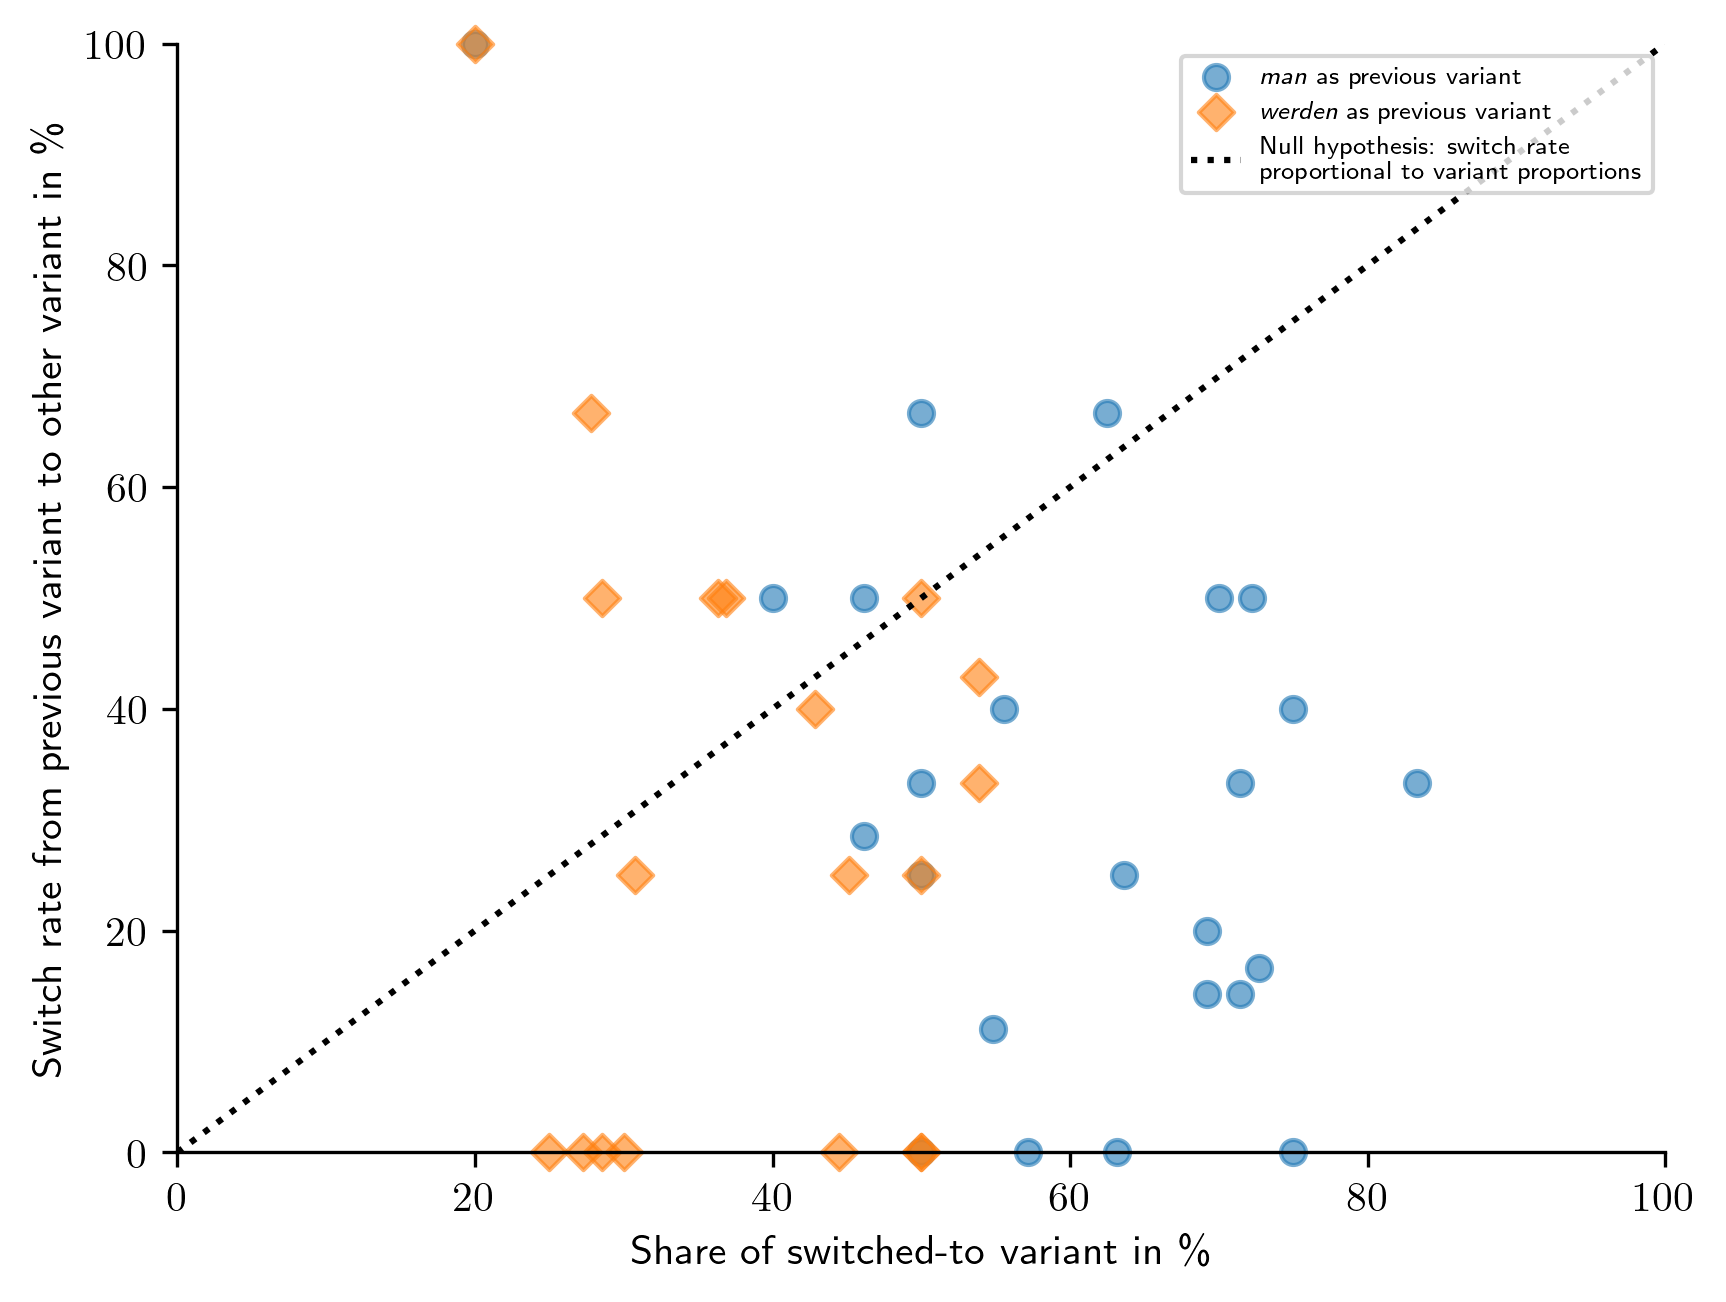

In [40]:
reload(quantification)

#considering switch/persistence from the very last use of any variant, irrespective of who uttered it, to the current variant
quantification.plot_switch_rate_over_variant_proportions(df, variation_sample, alternation_set, alternating)